# 5. 장고의 역할 이해하기
  
  
  
***

In [25]:
from IPython.core.display import Image, display,HTML

## (1) 웹 사이트의 작동 구조 이해하기  
가장 간단한 형태의 웹 사이트는 어떤 형태로 되어 있는지 살펴보자.  
### 프런트 엔드와 백엔드란?  
자동차로 예시를 들어보자.
프런트엔드 : 자동차의 외관과 실내 디자인  
백 엔드 : 엔진, 변속기, 브레이크, 에어컨 등의 기계장치
대부분의 웹 사이트가 프런트엔드와 백엔드 기술을 모두 사용하여 개발되지만 간단한 웹 사이트는 백엔드 없이 프런트엔드만으로 간략하게 개발하고 운영되기도 한다.  
앞에서 HTML,CSS,javascript로 만들었던 페이지가프런트엔드만으로 구성한 웹사이트의 한 예시이다.

#### 프런트엔드로만 구성한 웹사이트
PC나 모바일에서 웹 브라우저를 실행시켜 http://doitdjango.com 을 입력해 검색하는 상황을 가정해보자. http://doitdjango.com 라는 주소를 갖는 서버는 프런트엔드만으로 구성된 웹 사이트를 서비스하고 있다. 그럼 웹 브라우저는 인터넷에 접속해서 http://doitdjango.com 라는 주소를 가진 서버 컴퓨터에 요청을 보낸다. 그 서버에서 제공하는 웹 사이트가 HTML로만 이루어진 단순한 구조이고 특별한 추가 요구 사항이 없으면 서버에서 index.html을 찾아서 보내준다. 웹 브라우저는 index.html을 받아 렌더링해서 화면에 보여준다.

|클라이언트|->HTML요청->|서버|
|:---:|:---:|:---:|
|렌더링 후 출력|<-HTML 전송 <-|HTML|

index.html을 렌더링 해서 펼친 웹 페이지에 a href="about_me.html" 같은 태그가 구현한 영역이 있을 때 그 영역을 사용자가 클릭하면 웹 브라우저는 다시 해당 주소를 가진 서버에 about_me.html을 요청하고, 서버는 about_me.html 파일을 찾아서 보내준다. 그럼 웹브라우저는 다시 html파일을 렌더링 해서 보여준다.

#### 백엔드 기술이 필요한 이유  
이런 웹 사이트는 단순하기 때문에 개발하기 쉽다는 장점이 있다. 그러나 웹 사이트 운영자가 일방적으로 정보를 제공할 수만 있을 뿐, 방문자의 행동을 저장하고 그에 따른 반응을 못하는 등 동적인 기능을 수행할 수 없다. 또한 웹 사이트 관리자 또한 새로운 내용을 추가하과 싶다면 html 파일을 일일이 수정해야 한다. 그래서 대부분 웹 사이트는 데이터베이스를 활용한다.  
  
 데이터베이스를 활용하면 사용자 계정, 사용자의 게시글과 댓글, 조회수, 추천수 같은 정보를 수시로 저장할 수 있으며, HTML에 빈칸이 있는 템플릿을 만들어 필요한 정보를 DB에서 수시로 불러와 보여줄 수 있다. 

### 웹 프레임 워크의 역할  
하지만 DB를 배울 필요까진 없다. 웹 프레임워크가 그 역할을 해주기 때문이다. 웹 사이트들은 목적에 따라 디자인이 모두 다를 뿐 공통점이 많다.  
대부분 로그인 기능을 제공하기 때문에 계정 생성, 계정 정보 제공, 수정, 삭제 하는 기증이 공통적으로 필요하다. 대부분의 웹 사이트에서는  흔히 CRUD라고 하는
+ 생성(create)
+ 조회(read)
+ 수정(update)
+ 삭제(delete)  

이렇게 네가지 기능이 필수로 들어간다. 여기에 웹 사이트 관리자가 편하게 관리할 수 있도록, 관리자 페이지가 있으면 더욱 좋다. 웹 프레임워크는 이렇게 웹 개발에서 자주 사용하는 기능을 더 쉽게 개발할 수 있게 도와준다. 그래서 웹 프레임워크를 이용하면 개발 시간을 단축하면서도 안정적인 웹 사이트를 구축할 수 있다.

---

## (2) 장고의 작동 구조 이해하기
여러 웹 프레임워크 중 파이썬으로 웹 개발을 할 때 가장 많이 사용하는 것이 바로 장고이다. 이제 장고를 이용해서 웹 사이트를 만들어 보기전에 장고로 개발한 웹이 어떻게 구성되어있는지 알아보자.

### 장고로 만든 웹 사이트의 작동 구조  
아래 그림은 사용자가 PC나 모바일로 주소창에 주소를 입력하였을 때 장고로 만든 웹 사이트에서 일어나는 과정이다.

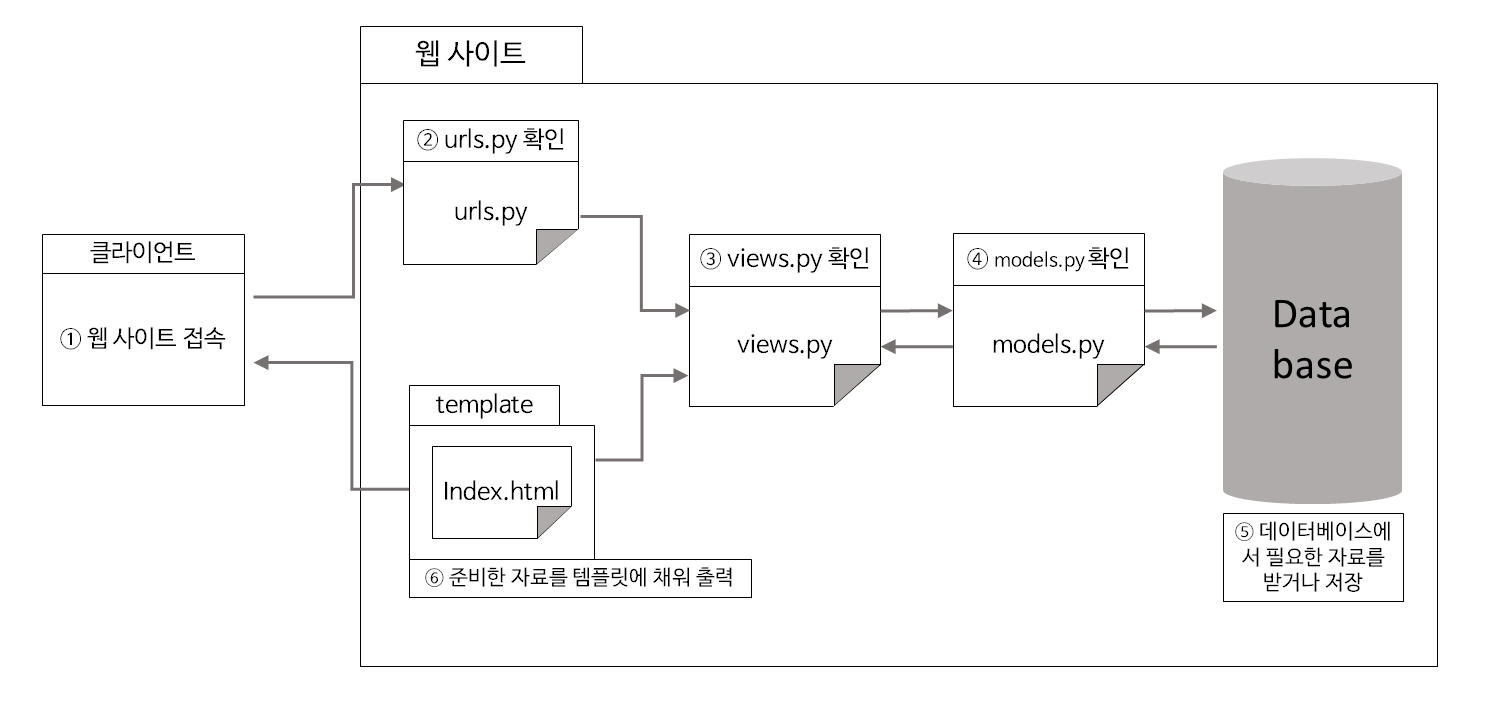

In [23]:
Image("images\Django.png", width=940)

1.  먼저 클라이언트(웹 브라우저)는 일련의 과정을 거쳐 입력한 주소의 서버를 찾아간다.  

2. 프런트엔드 기술만으로 만든 웹 사이트라면 index.html만을 요청했던것과 달리 우선 urls.py를 요청해 개발자가 써놓은 내용을 확인한다. urls.py에서는 해당 URL로 접속했을 때 'index함수를 실행시키자', 'about_me라는 함수를 실행시키자' 등의 상황에 맞는 함수를 실행시키는 내용이 기술되어있다고 가정하자.
3. urls.py에서 언급하는 함수 또는 클래스는 views.py에서 정의한다. views.py의 index함수에는 '최근 게시글 5개를 index.html'에 채워서 보내준다.' 같은 내용이 있을 수있다. 아니면 클라이언트에 입력이 delete_post라는 함수 조건을 만족하였다면 '게시글을 삭제한다.' 같은 내용이 기술되었을 수도 있다.
4. 게시글(post)에 대한 내용은 models.py에서 정의한다. '게시글이 담아야 할 정보는 제목, 글, 내용, 작성자, 작성일이다.'와 같은 식으로 정의한다. 장고는 이렇게 자료의 형태를 정의한 클래스를 model이라고 한다.
5. models.py에서 정의한 모델에 맞게 DB에서 필요한 자료를 가져온다. 예를들어 views.py의 index함수가 DB에서 최근 게시물 5개를 가져오는 기능을 한다면, DB에서 최근 게시물 5개를 불러온다.
6. 마지막으로 DB에서 가져온 자료를 템플릿(여기서는 index.html)의 빈 칸에 채워져 클라이언트의 웹 브라우저로 보내진다.

___

### MTV 패턴이란?
위에서 그림에서 보듯이 Django로 만든 웹 사이트는
* Model(모델)로 자료의 형태를 정의하고
* View(뷰)로 어떤 자료를 어떤 동작으로 보여줄지 정의하며
* Template(템플릿)으로 웹 페이지에서 출력할 모습을 정의한다.  
이러한 작동구조를 이니셜만 모아 MTV 패턴이라고 부른다. 이렇게 분리해서 웹 사이트 기능을 관리함으로써 프런트엔드 개발자는 HTML을 비롯한 화면 구성에 집중할 수 있게 되고, 백엔드 개발자도 화면 뒤의 작업에 집중할 수 있게 된다. 